# Predict diabetes using ANN (tabular data)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns =["Pregnancy","Glucose","BloodPressure","SkinThickness",'Insulin','BMI',"DiabetesPedigreeFunction","Age","Outcome"]
df= pd.read_csv(url,names=columns)
df.head()

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
        Pregnancy     Glucose  BloodPressure  SkinThickness     Insulin  \
count  768.000000  768.000000     768.000000     768.000000  768.000000   
mean     3.845052  120.894531      69.105469      20.536458   79.799479   
std      3

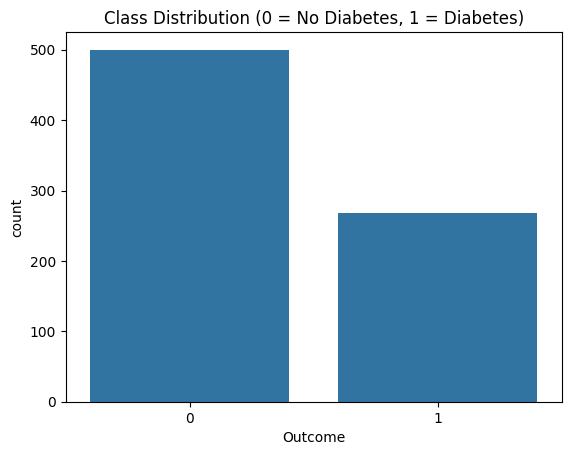

In [6]:
# Step 3️⃣ EDA (Exploratory Data Analysis — optional)
print(df.info())       # Shows dataset structure, column types, and null values
print(df.describe())   # Gives summary statistics (mean, std, min, max, etc.)

sns.countplot(x='Outcome', data=df)   # Bar chart for class distribution
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

In [15]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n test accuracy : {accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7338 - loss: 0.6204 

 test accuracy : 0.73


C:\Users\dell\AppData\Local\Temp\ipykernel_30732\529909843.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


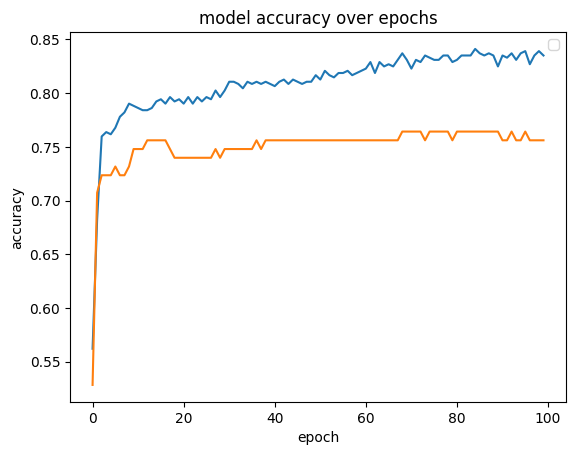

In [16]:
# Plot of Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy over epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Pre Processing

In [7]:
X=df.drop("Outcome",axis=1)
y=df['Outcome']
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2,random_state=42)


In [8]:
### build ANN model
model=Sequential()
model.add(Dense(16, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### compile model

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# train model
history= model.fit(X_train,y_train,epochs=100,batch_size=16,validation_split=0.2)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5621 - loss: 0.7086 - val_accuracy: 0.5285 - val_loss: 0.7030
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6823 - loss: 0.6711 - val_accuracy: 0.7073 - val_loss: 0.6664
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7597 - loss: 0.6378 - val_accuracy: 0.7236 - val_loss: 0.6330
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7637 - loss: 0.6031 - val_accuracy: 0.7236 - val_loss: 0.6020
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7617 - loss: 0.5681 - val_accuracy: 0.7236 - val_loss: 0.5716
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7678 - loss: 0.5376 - val_accuracy: 0.7317 - val_loss: 0.5437
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7780 - loss: 0.5137 - val_accuracy: 0.7236 - val_loss: 0.5228
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7821 - loss: 0.4953 - val_accuracy: 0.7236 -

## evaluate performance

In [11]:
loss,acc=model.evaluate(X_test,y_test)
print(f"\n test accuracy : {acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7338 - loss: 0.6204

 test accuracy : 0.73


## plot training results 

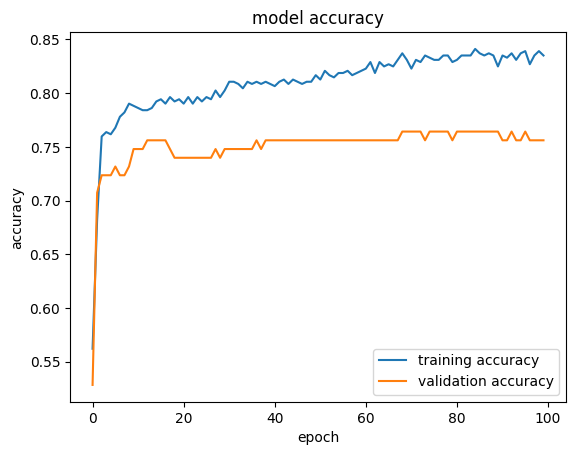

In [12]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## make prediction

In [13]:
sample = X_test[0].reshape(1,-1)
prediction=model.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [14]:
print("prediction probability",prediction[0][0])
print("class:",1 if prediction[0][0] <= 0.5 else 1)

prediction probability 0.22591908
class: 1


# Line-by-Line Explanation (Quick Summary)
| Code Block | What It Does|
|------------|--------------|
|Sequential()|Creates a model architecture|
|Dense (16,activation 'relu')|Hidden layer with 16 neurons and ReLU activation|
|input_shape=(X_train.shape[1],)|Set number of feature input|
|sigmoid|Gives output between and 1 (probability)|
|binary_crossentropy|Loss function for bina classification|
|fit()|Trains the model usin training set|
|evaluate()|Checks how well mod does on test set|
|predict()|Makes predictions on data|

# Understand the Dataset
This dataset contains medical information like:
| Feature|Description|
|---------|----------|
|Pregnancies|Number of pregnancies |
|Glucose|Plasma glucose concentration|
|Blood Pressure|Diastolic blood pressuer|
|Skin Thickness|Skin fold thickness|
|Insulin |Serum insulin|
|BMI|Body mass index|
|Diabetes Pedigree Function|Genetic diabetes likelihood|
|Age|Age of patient|
|Outcome|0 No diabetes, 1 = Hi diabetes|